In [1]:
from mxnet import nd
from time import time

a = nd.ones(shape=1000)
b = nd.ones(shape=1000)

In [3]:
start = time()
c = nd.zeros(shape=1000)
for i in range(1000):
    c[i] = a[i] + b[i] #分開做運算
time() - start 

0.27374744415283203

In [4]:
start = time()
d = a + b
time() - start#向量計算比一般計算快 因此在做運算時盡量用向量運算

0.0009667873382568359

In [5]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random

In [6]:
num_inputs = 2 #輸入個數(特徵值
num_examples = 1000 #訓練樣本數
true_w = [2, -3.4] #線性回歸模型真實權重
true_b = 4.2 #偏差值
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))#shape表示幾乘幾的矩陣 scale標準差
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [7]:
features[0], labels[0] #features 每行長度為2的向量 label長度為1的向量

(
 [1.1630785 0.4838046]
 <NDArray 2 @cpu(0)>,
 
 [4.879625]
 <NDArray 1 @cpu(0)>)

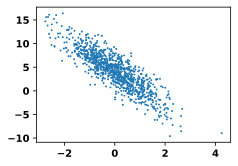

In [8]:
def use_svg_display():
    # 用向量圖顯示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 設置圖的尺寸
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1);  # 加分號只顯示圖

In [9]:
#數據樣本讀取函數
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 樣本的讀取順序是隨機
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)  # take函數根據索引值返回對應的元素

In [25]:
#讀取小量數據樣本並且印出來。每個批量為(batch_size,2) 分別對應批量大小和輸入個數;標籤形狀為批量大小
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


[[-1.1688148   1.558071  ]
 [-0.08295608 -0.54641724]
 [ 0.76997536  1.1010492 ]
 [-0.54634386  1.4924443 ]
 [ 0.69407785 -1.6696625 ]
 [-1.9584894   0.3811466 ]
 [ 0.88619477 -0.73974735]
 [-0.27973762  0.0749516 ]
 [-1.1232466   1.0477206 ]
 [ 1.7984186   0.8096278 ]]
<NDArray 10x2 @cpu(0)> 
[-3.4331114  5.87861    2.001314  -1.9613179 11.26492   -1.0243565
  8.485436   3.389242  -1.6048086  5.0375466]
<NDArray 10 @cpu(0)>


In [14]:
#將權重初始化成均值為0,標準差為0.01的正態隨機數 偏差值初始化為0
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))

In [28]:
#創建梯度
w.attach_grad()
b.attach_grad()

In [27]:
def linreg(X, w, b):  #定義模型
    return nd.dot(X, w) + b

In [16]:
#定義損失函數  使用常見的平方誤差來衡量預測目標跟真實目標之間的差距
def squared_loss(y_hat, y):  #須把真實值y便形成預測值y_hat的形狀
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2  #使用常用的平方函數作為損失函數

In [18]:
def sgd(params, lr, batch_size): 
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [29]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):  # 訓練模型需要num_epochs個迭代週期
    # 在每一个迭代週期中，會使用訓練數據集中所有樣本一次(假設樣本數能夠被批量大小整除)
    # X和y分别是小批量樣本的特徵和標籤
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)  # l是有關小批量X和y的损失
            
        l.backward()  # 小批量的損失對模型参數求梯度
        sgd([w, b], lr, batch_size)  # 使用小批量隨機梯度下降迭代模型参數
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.034651
epoch 2, loss 0.000122
epoch 3, loss 0.000049


In [30]:
true_w,w #訓練後可以將學到的參數和生成訓練的真實參數

([2, -3.4],
 
 [[ 1.999638]
  [-3.399716]]
 <NDArray 2x1 @cpu(0)>)

In [31]:
true_b,b

(4.2,
 
 [4.199638]
 <NDArray 1 @cpu(0)>)